In [1]:
# 禁用GPU（仅个人情况）
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
import glob
import cv2

# 前处理 

## 数据增强器

# 加载数据

`python glob.glob()`

glob()函数可以将某目录下所有跟通配符模式相同的文件放到一个列表中，

有了这个函数，我们再想生成所有文件的列表就不需要使用for循环遍历目录了，直接使用glob.glob(path+pattern)的方式获取

该函数对大小写不敏感，例如.jpg与.JPG是一样的

https://www.cnblogs.com/suoyike1001/p/15228045.html#:~:text=python%20glob.glob%20%28%29,glob%20%28%29%E5%87%BD%E6%95%B0%E5%8F%AF%E4%BB%A5%E5%B0%86%E6%9F%90%E7%9B%AE%E5%BD%95%E4%B8%8B%E6%89%80%E6%9C%89%E8%B7%9F%E9%80%9A%E9%85%8D%E7%AC%A6%E6%A8%A1%E5%BC%8F%E7%9B%B8%E5%90%8C%E7%9A%84%E6%96%87%E4%BB%B6%E6%94%BE%E5%88%B0%E4%B8%80%E4%B8%AA%E5%88%97%E8%A1%A8%E4%B8%AD%EF%BC%8C%E6%9C%89%E4%BA%86%E8%BF%99%E4%B8%AA%E5%87%BD%E6%95%B0%EF%BC%8C%E6%88%91%E4%BB%AC%E5%86%8D%E6%83%B3%E7%94%9F%E6%88%90%E6%89%80%E6%9C%89%E6%96%87%E4%BB%B6%E7%9A%84%E5%88%97%E8%A1%A8%E5%B0%B1%E4%B8%8D%E9%9C%80%E8%A6%81%E4%BD%BF%E7%94%A8for%E5%BE%AA%E7%8E%AF%E9%81%8D%E5%8E%86%E7%9B%AE%E5%BD%95%E4%BA%86%EF%BC%8C%E7%9B%B4%E6%8E%A5%E4%BD%BF%E7%94%A8glob.glob%20%28path%2Bpattern%29%E7%9A%84%E6%96%B9%E5%BC%8F%E8%8E%B7%E5%8F%96%EF%BC%8C%E4%B8%BE%E4%B8%AA%E4%BE%8B%E5%AD%90%EF%BC%9A%20%E8%BF%94%E5%9B%9E%E7%9B%AE%E5%BD%95%E4%B8%8B%E6%89%80%E6%9C%89.tif%E6%96%87%E4%BB%B6

In [3]:
image_names = glob.glob("brain_2d_seg_data/training/images/*.png")
image_names.sort()
image_names_subset = image_names[0:len(image_names)]
images = [cv2.imread(image, 0) for image in image_names_subset]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

In [4]:
print("Image data shape is: ", image_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())

Image data shape is:  (915, 160, 160, 1)
Max pixel value in image is:  255


In [5]:
#Normalize images
image_dataset = image_dataset /255.

In [6]:
X_train = image_dataset

### to_categorical

In [7]:
from tensorflow.keras.utils import to_categorical

#n_classes = 3
#train_label = to_categorical(y_train, num_classes=n_classes)

In [8]:
# label 需要换一种加载方式 train_label
import glob
mask_names = glob.glob("brain_2d_seg_data/training/labels/*.png")
mask_names.sort()
print(mask_names)

['brain_2d_seg_data/training/labels_np\\0.png', 'brain_2d_seg_data/training/labels_np\\1.png', 'brain_2d_seg_data/training/labels_np\\10.png', 'brain_2d_seg_data/training/labels_np\\100.png', 'brain_2d_seg_data/training/labels_np\\101.png', 'brain_2d_seg_data/training/labels_np\\102.png', 'brain_2d_seg_data/training/labels_np\\103.png', 'brain_2d_seg_data/training/labels_np\\104.png', 'brain_2d_seg_data/training/labels_np\\105.png', 'brain_2d_seg_data/training/labels_np\\106.png', 'brain_2d_seg_data/training/labels_np\\107.png', 'brain_2d_seg_data/training/labels_np\\108.png', 'brain_2d_seg_data/training/labels_np\\109.png', 'brain_2d_seg_data/training/labels_np\\11.png', 'brain_2d_seg_data/training/labels_np\\110.png', 'brain_2d_seg_data/training/labels_np\\111.png', 'brain_2d_seg_data/training/labels_np\\112.png', 'brain_2d_seg_data/training/labels_np\\113.png', 'brain_2d_seg_data/training/labels_np\\114.png', 'brain_2d_seg_data/training/labels_np\\115.png', 'brain_2d_seg_data/traini

In [9]:
mask_names_subset = mask_names[0:len(mask_names)]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)

In [10]:
mask_dataset.shape

(915, 160, 160)

In [11]:
print("Labels in the mask are : ", np.unique(mask_dataset))

Labels in the mask are :  [0 1 2]


In [12]:
y_train= np.expand_dims(mask_dataset, axis = 3)

In [13]:
y_train.shape

(915, 160, 160, 1)

### 对数据进行 One-hot 编码 `to_categorical`
【图像分割】图像分割中数据预处理 One-hot 编码的两种实现方式
https://blog.csdn.net/baidu_36511315/article/details/105528546

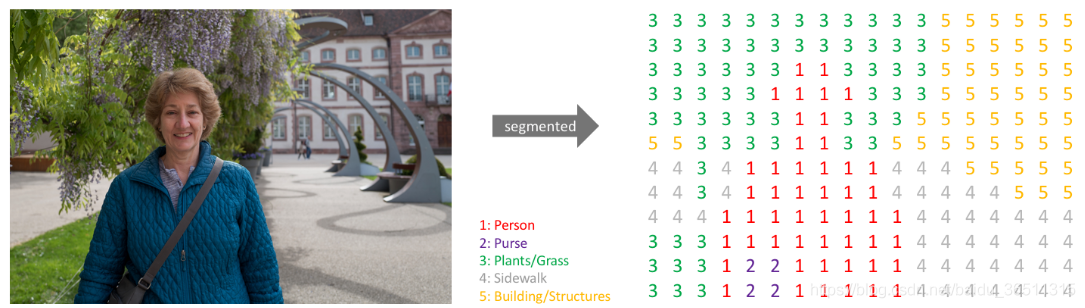

（图片来源：https://www.eefocus.com/communication/413211/r0）

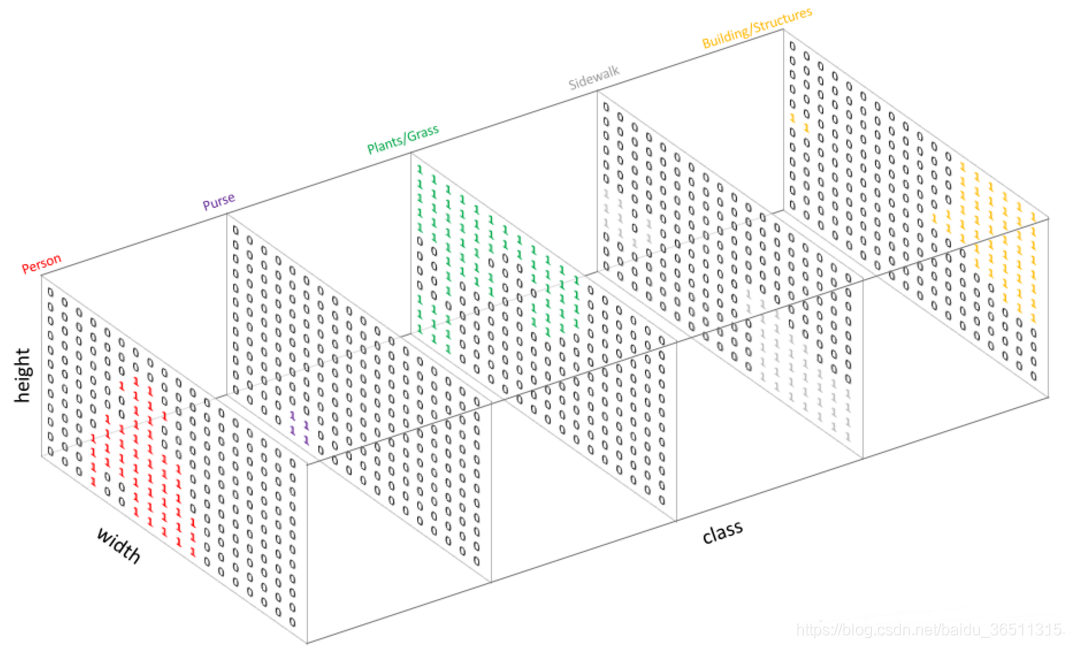

（图片来源：https://www.eefocus.com/communication/413211/r0）

keras中to_categorical函数解析

https://blog.csdn.net/moyu123456789/article/details/83444140

浅谈keras中的keras.utils.to_categorical用法

https://cloud.tencent.com/developer/article/1724556

In [14]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=3)
############
#y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 3))#???????? 保留0，1，2的维度，最后一个设成类数


In [15]:
train_masks_cat.shape

(915, 160, 160, 3)

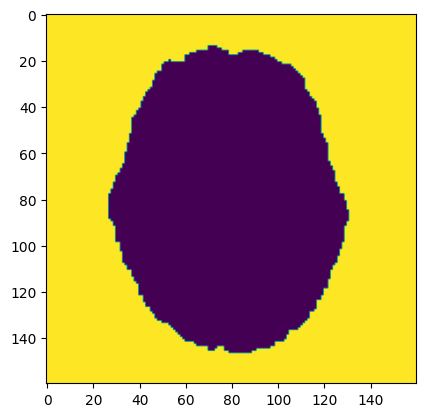

In [33]:
plt.imshow(train_masks_cat[0,:,:,0])

## Create our model 

Use:
- Max-pooling & up-convolutions
- 16 deep in first conv layer
- 2 convolutions in each stage
- 4 skip connections
- padding to get same size outputs


Set each layer to `x`, to make it easier to copy-paste and re-arrange things. 



In [17]:
img_shape = (160,160,1) ##################### 3 classes
input_layer = keras.layers.Input(img_shape)

x = keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu')(input_layer)
x = keras.layers.Conv2D(16,(3,3), padding='same',activation='relu')(x)
out_layer1 = x
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = keras.layers.Conv2D(32,(3,3), padding='same',activation='relu')(x)
out_layer2 = x
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Conv2D(64,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(64,(3,3), padding='same',activation='relu')(x)
out_layer3 = x
x = keras.layers.MaxPooling2D((2,2))(x)


x = keras.layers.Conv2D(128,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(128,(3,3), padding='same',activation='relu')(x)
out_layer4 = x
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Conv2D(256,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(256,(3,3), padding='same',activation='relu')(x)

x = keras.layers.UpSampling2D((2,2))(x)
x = keras.layers.Conv2D(128,(2,2),padding='same',activation='relu')(x)

x = keras.layers.Concatenate(axis=3)([out_layer4,x])
x = keras.layers.Conv2D(128,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(128,(3,3), padding='same',activation='relu')(x)


x = keras.layers.UpSampling2D((2,2))(x)
x = keras.layers.Conv2D(64,(2,2),padding='same',activation='relu')(x)

x = keras.layers.Concatenate(axis=3)([out_layer3,x])
x = keras.layers.Conv2D(64,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(64,(3,3), padding='same',activation='relu')(x)


x = keras.layers.UpSampling2D((2,2))(x)
x = keras.layers.Conv2D(32,(2,2), padding='same',activation='relu')(x)


x = keras.layers.Concatenate(axis=3)([out_layer2,x])   # axis specifies along which axis the input will be concatenated
x = keras.layers.Conv2D(32,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(32,(3,3), padding='same',activation='relu')(x)

x = keras.layers.UpSampling2D((2,2))(x)
x = keras.layers.Conv2D(16,(2,2), padding='same',activation='relu')(x)

x = keras.layers.Concatenate(axis=3)([out_layer1,x])
x = keras.layers.Conv2D(16,(3,3), padding='same',activation='relu')(x)
x = keras.layers.Conv2D(16,(3,3), padding='same',activation='relu')(x)

# with softmax to get 3-class classification at each pixel
x = keras.layers.Conv2D(3,(1,1), padding='same',activation='softmax')(x) ###############  need one hot

model = keras.Model(input_layer, x)

###  Compile and visualize it

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 160, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 conv2d_22 (Conv2D)             (None, 160, 160, 3)  51          ['conv2d_21[0][0]']              
                                                                                                  
Total params: 1,940,851
Trainable params: 1,940,851
Non-trainable params: 0
__________________________________________________________________________________________________


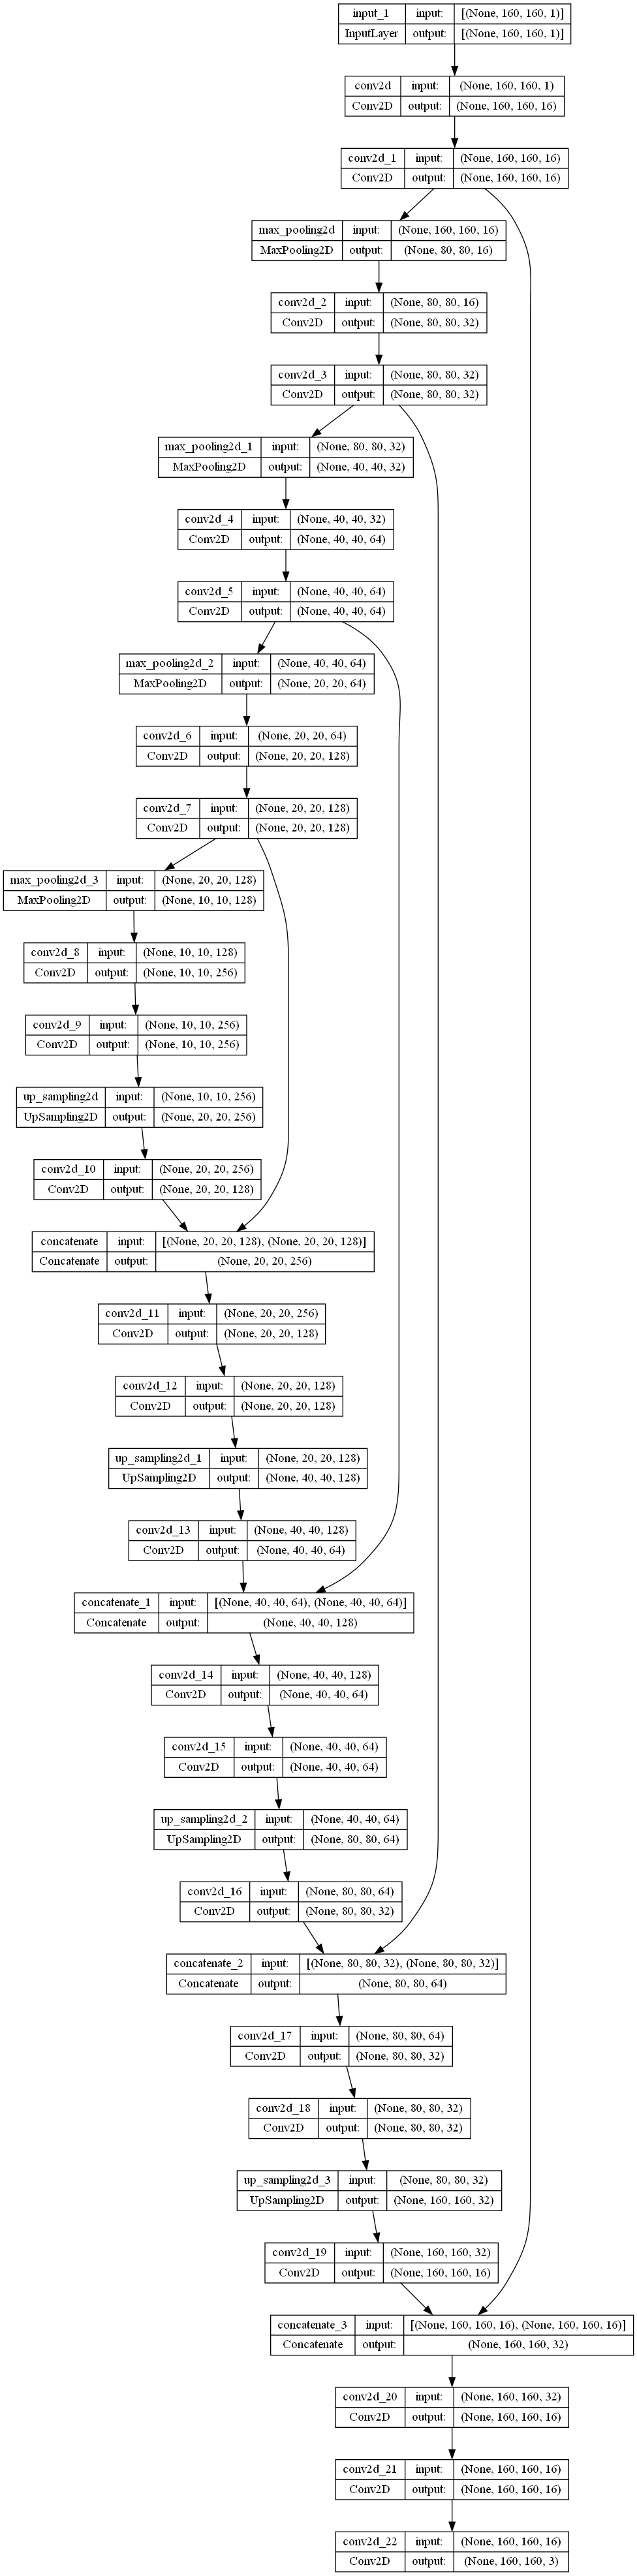

In [18]:
"""
# Compile the model
optimizer = keras.optimizers.Adam()

#loss = ['binary_crossentropy',dice_loss]
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False) ## 有softmax flag=False

# metrics = ['binary_accuracy',dice_metric]
metrics = ['accuracy']

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics) 
"""
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# What does the finished model look like?
model.summary()
keras.utils.plot_model(model, show_shapes=True, rankdir='TD')

## Fit the model

The fit() function takes x and y -- we want to pass the image and mask  correspondingly.

But since we are using generators, we need the output of the generator to be: `(image, mask)`

We can create this behaviour by using `zip()` to zip together the image and mask generators. 




In [ ]:
915   image
915*3 masks

229=916/4

In [21]:
# combine generators into one which yields both image and masks
# train_generator = zip(image_generator_train, train_masks_cat)


history = model.fit(X_train,
                    #train_generator,
                    train_masks_cat,
                    batch_size = 4,
                    #steps_per_epoch=100,
                    epochs=10)

Epoch 1/10
229/229 [==============================] - 74s 322ms/step - loss: 0.0802 - accuracy: 0.9661
Epoch 2/10
229/229 [==============================] - 73s 318ms/step - loss: 0.0803 - accuracy: 0.9662
Epoch 3/10
229/229 [==============================] - 74s 325ms/step - loss: 0.0791 - accuracy: 0.9666
Epoch 4/10
229/229 [==============================] - 78s 339ms/step - loss: 0.0786 - accuracy: 0.9668
Epoch 5/10
229/229 [==============================] - 79s 345ms/step - loss: 0.0791 - accuracy: 0.9668
Epoch 6/10
229/229 [==============================] - 78s 342ms/step - loss: 0.0789 - accuracy: 0.9668
Epoch 7/10
229/229 [==============================] - 77s 334ms/step - loss: 0.0823 - accuracy: 0.9662
Epoch 8/10
229/229 [==============================] - 76s 331ms/step - loss: 0.0862 - accuracy: 0.9652
Epoch 9/10
229/229 [==============================] - 71s 309ms/step - loss: 0.0779 - accuracy: 0.9672
Epoch 10/10
229/229 [==============================] - 70s 307ms/step - l

# Test

In [20]:
import os
import cv2
import numpy as np

brain_masks_path = "brain_2d_seg_data/test/brain_masks/"
ventricles_masks_path = "brain_2d_seg_data/test/ventricle_masks/"

list_brain_masks, list_ventricle_masks = [],[]
for i in os.listdir(brain_masks_path):
    list_brain_masks.append(i)
list_brain_masks = sorted(list_brain_masks)

for i in os.listdir(ventricles_masks_path):
    list_ventricle_masks.append(i)
list_ventricle_masks = sorted(list_ventricle_masks)

SavePath_np = "./brain_2d_seg_data/test/labels_png/"
if not os.path.exists(SavePath_np):
    os.mkdir(SavePath_np)

# for i in range (2): 测试用
for i in range (len(list_brain_masks)):
    img1 = cv2.imread(brain_masks_path+list_brain_masks[i])
    img2 = cv2.imread(ventricles_masks_path+list_ventricle_masks[i])
    # 转成灰度图
    gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    # 合成一张label，定义类别值为[0，1，2]
    gray1=gray1/255
    gray2=gray2/255*2
    label = gray1+gray2  #重叠
    label[label==3]=2
    # 保存为npy
    #np.save(SavePath_np + str(i)+ ".png", label)
    #print("label {0} saved".format(i))  # print( "label", i, "saved")
    
    # 保存为png
    cv2.imwrite(SavePath_np + str(i) + ".png",label)
    print("label {0} saved".format(i))  # print( "label", i, "saved")

label 0 saved
label 1 saved
label 2 saved
label 3 saved
label 4 saved
label 5 saved
label 6 saved
label 7 saved
label 8 saved
label 9 saved
label 10 saved
label 11 saved
label 12 saved
label 13 saved
label 14 saved
label 15 saved
label 16 saved
label 17 saved
label 18 saved
label 19 saved
label 20 saved
label 21 saved
label 22 saved
label 23 saved
label 24 saved
label 25 saved
label 26 saved
label 27 saved
label 28 saved
label 29 saved
label 30 saved
label 31 saved
label 32 saved
label 33 saved
label 34 saved
label 35 saved
label 36 saved
label 37 saved
label 38 saved
label 39 saved
label 40 saved
label 41 saved
label 42 saved
label 43 saved
label 44 saved
label 45 saved
label 46 saved
label 47 saved
label 48 saved
label 49 saved
label 50 saved
label 51 saved
label 52 saved
label 53 saved
label 54 saved
label 55 saved
label 56 saved
label 57 saved
label 58 saved
label 59 saved
label 60 saved
label 61 saved
label 62 saved
label 63 saved
label 64 saved
label 65 saved
label 66 saved
label

In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen_test = ImageDataGenerator(rescale=1./255.0)

In [23]:
image_generator_test = datagen_test.flow_from_directory('brain_2d_seg_data/test',
                                                    target_size=(160,160),
                                                    classes=['images'],
                                                    class_mode=None,
                                                    seed=1,
                                                    color_mode='grayscale',
                                                    batch_size=1)

label_generator_test = datagen_test.flow_from_directory('brain_2d_seg_data/test',
                                                  target_size=(160,160),
                                                  classes=['labels_png'],
                                                  class_mode=None,
                                                  seed=1,
                                                  color_mode='grayscale',
                                                  batch_size=1)

Found 197 images belonging to 1 classes.
Found 197 images belonging to 1 classes.


In [24]:
test_generator = zip(image_generator_test, label_generator_test)

In [25]:
metrics = model.evaluate(test_generator,steps=197,return_dict=True)
print(metrics)

197/197 [==============================] - 7s 32ms/step - loss: 0.0254 - accuracy: 0.6567
{'loss': 0.025414910167455673, 'accuracy': 0.6567487120628357}


1/1 [==============================] - 0s 41ms/step


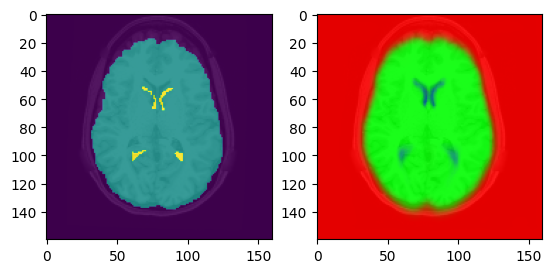

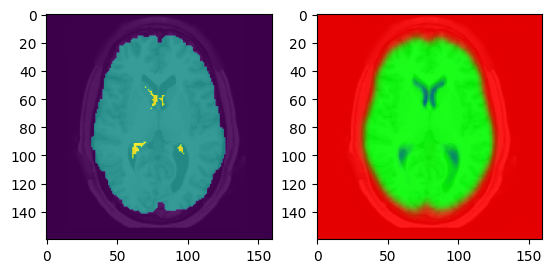

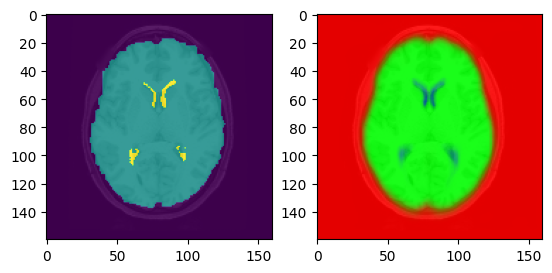

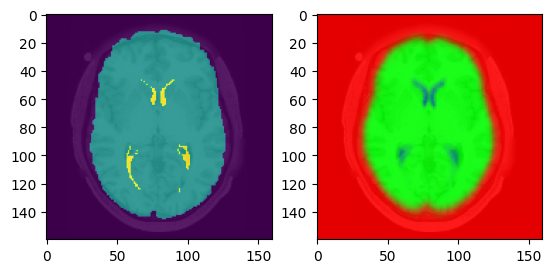

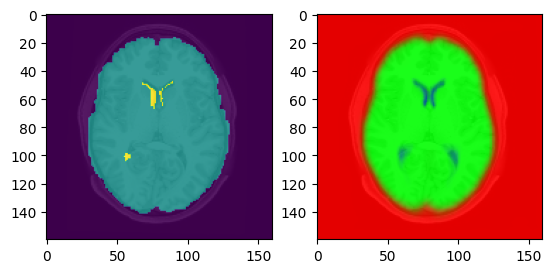

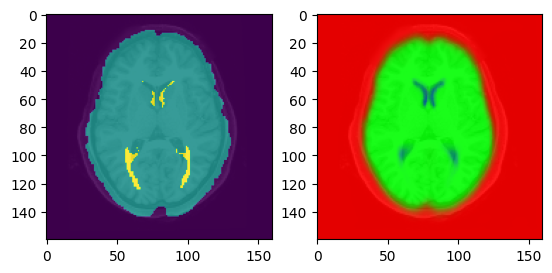

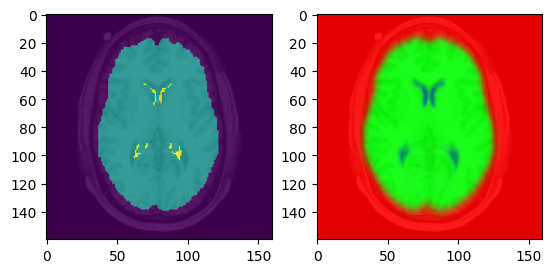

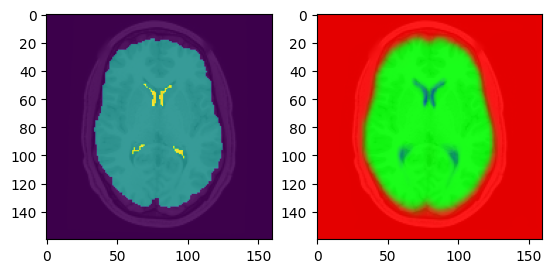

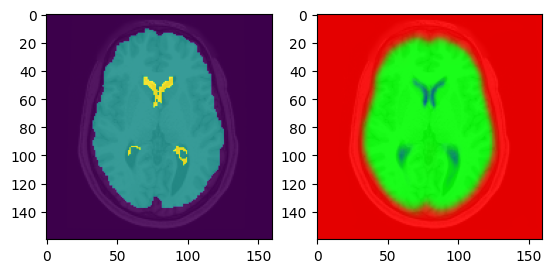

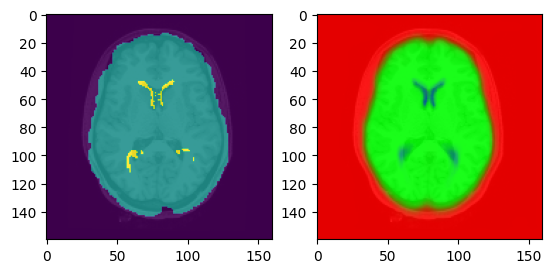

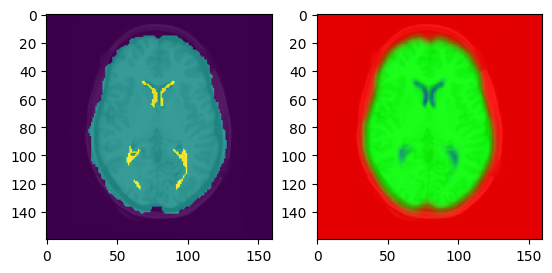

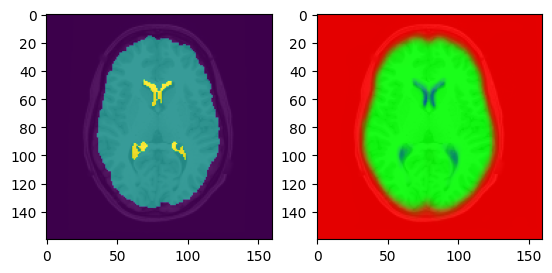

In [29]:
#plot some examples from the test set

for sample,(image,label) in enumerate(test_generator):
  
  predicted = model.predict(image)

  plt.figure()

  plt.subplot(1,2,1)
  plt.imshow(np.squeeze(image),cmap='gray')
  plt.imshow(np.squeeze(label),alpha=0.9)
  
  plt.subplot(1,2,2)
  plt.imshow(np.squeeze(image),cmap='gray')
  plt.imshow(np.squeeze(predicted),alpha=0.9)
  #plt.imshow(np.squeeze(predicted),cmap='gray')

  if sample > 10:
    break
  